In [2]:
#hide
from fastbook import *

In [3]:
from fastai.vision.all import *

### Cat vs Dog Model Re-Production

* Car or Truck?
* Train model on cars vs, use learner first with car data. Further train with motorcycle/bike data.

1. [x] Obtain datasets
1. [x] Extract car data (untar_data)
1. Prepare DataLoader object
1. Train model using a learner
1. Repeat steps 2-4 using bike data
1. Fine tune model


Example of how to use untar_data if the dataset is from an external source (url). Incorporates fastai helper function download_data()
```python
url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
path = download_data(url)
path.as_posix()
# '/home/gg/.fastai/archive/flower_photos.tgz'

data = untar_data(path.as_posix()) # or pass str(path)
data
# Path('/home/gg/.fastai/data/flower_photos')
```

### Extracting Dataset from Kaggle using Kaggle API calls and saving to remote server dataset folder

In [1]:
!kaggle datasets list -s 'car or truck'

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ryanholbrook/car-or-truck                                  Car or Truck?                                    78MB  2020-09-17 21:53:46           1474         23  0.375            
akhilv11/border-crossing-entry-data                        Border Crossing Entry Data                        4MB  2019-08-21 14:51:34           9216        247  1.0              
uciml/aps-failure-at-scania-trucks-data-set                 Air pressure system failures in Scania trucks   36MB  2018-02-19 15:38:09           4570        138  0.7647059        
toramky/automobile-dataset                                 Automobile Dataset                            

In [2]:
!kaggle datasets download -d ryanholbrook/car-or-truck

 97%|████████████████████████████████████▋ | 75.0M/77.7M [00:02<00:00, 48.8MB/s]
100%|██████████████████████████████████████| 77.7M/77.7M [00:02<00:00, 37.3MB/s]


In [1]:
!unzip car-or-truck -d ../datasets

Archive:  car-or-truck.zip
  inflating: ../datasets/train/Car/00002.jpeg  
  inflating: ../datasets/train/Car/00004.jpeg  
  inflating: ../datasets/train/Car/00005.jpeg  
  inflating: ../datasets/train/Car/00006.jpeg  
  inflating: ../datasets/train/Car/00008.jpeg  
  inflating: ../datasets/train/Car/00010.jpeg  
  inflating: ../datasets/train/Car/00011.jpeg  
  inflating: ../datasets/train/Car/00016.jpeg  
  inflating: ../datasets/train/Car/00017.jpeg  
  inflating: ../datasets/train/Car/00019.jpeg  
  inflating: ../datasets/train/Car/00020.jpeg  
  inflating: ../datasets/train/Car/00023.jpeg  
  inflating: ../datasets/train/Car/00025.jpeg  
  inflating: ../datasets/train/Car/00028.jpeg  
  inflating: ../datasets/train/Car/00030.jpeg  
  inflating: ../datasets/train/Car/00031.jpeg  
  inflating: ../datasets/train/Car/00035.jpeg  
  inflating: ../datasets/train/Car/00037.jpeg  
  inflating: ../datasets/train/Car/00038.jpeg  
  inflating: ../datasets/train/Car/00039.jpeg  
  inflating: 

  inflating: ../datasets/train/Car/00435.jpeg  
  inflating: ../datasets/train/Car/00436.jpeg  
  inflating: ../datasets/train/Car/00439.jpeg  
  inflating: ../datasets/train/Car/00440.jpeg  
  inflating: ../datasets/train/Car/00442.jpeg  
  inflating: ../datasets/train/Car/00443.jpeg  
  inflating: ../datasets/train/Car/00444.jpeg  
  inflating: ../datasets/train/Car/00447.jpeg  
  inflating: ../datasets/train/Car/00450.jpeg  
  inflating: ../datasets/train/Car/00451.jpeg  
  inflating: ../datasets/train/Car/00452.jpeg  
  inflating: ../datasets/train/Car/00453.jpeg  
  inflating: ../datasets/train/Car/00456.jpeg  
  inflating: ../datasets/train/Car/00457.jpeg  
  inflating: ../datasets/train/Car/00458.jpeg  
  inflating: ../datasets/train/Car/00460.jpeg  
  inflating: ../datasets/train/Car/00461.jpeg  
  inflating: ../datasets/train/Car/00463.jpeg  
  inflating: ../datasets/train/Car/00464.jpeg  
  inflating: ../datasets/train/Car/00465.jpeg  
  inflating: ../datasets/train/Car/00468

  inflating: ../datasets/train/Car/01251.jpeg  
  inflating: ../datasets/train/Car/01252.jpeg  
  inflating: ../datasets/train/Car/01253.jpeg  
  inflating: ../datasets/train/Car/01255.jpeg  
  inflating: ../datasets/train/Car/01257.jpeg  
  inflating: ../datasets/train/Car/01258.jpeg  
  inflating: ../datasets/train/Car/01260.jpeg  
  inflating: ../datasets/train/Car/01261.jpeg  
  inflating: ../datasets/train/Car/01262.jpeg  
  inflating: ../datasets/train/Car/01263.jpeg  
  inflating: ../datasets/train/Car/01264.jpeg  
  inflating: ../datasets/train/Car/01266.jpeg  
  inflating: ../datasets/train/Car/01269.jpeg  
  inflating: ../datasets/train/Car/01271.jpeg  
  inflating: ../datasets/train/Car/01274.jpeg  
  inflating: ../datasets/train/Car/01275.jpeg  
  inflating: ../datasets/train/Car/01276.jpeg  
  inflating: ../datasets/train/Car/01279.jpeg  
  inflating: ../datasets/train/Car/01282.jpeg  
  inflating: ../datasets/train/Car/01283.jpeg  
  inflating: ../datasets/train/Car/01284

  inflating: ../datasets/train/Car/01989.jpeg  
  inflating: ../datasets/train/Car/01990.jpeg  
  inflating: ../datasets/train/Car/01993.jpeg  
  inflating: ../datasets/train/Car/01994.jpeg  
  inflating: ../datasets/train/Car/01995.jpeg  
  inflating: ../datasets/train/Car/01996.jpeg  
  inflating: ../datasets/train/Car/01997.jpeg  
  inflating: ../datasets/train/Car/01998.jpeg  
  inflating: ../datasets/train/Car/02001.jpeg  
  inflating: ../datasets/train/Car/02002.jpeg  
  inflating: ../datasets/train/Car/02004.jpeg  
  inflating: ../datasets/train/Car/02005.jpeg  
  inflating: ../datasets/train/Car/02006.jpeg  
  inflating: ../datasets/train/Car/02008.jpeg  
  inflating: ../datasets/train/Car/02010.jpeg  
  inflating: ../datasets/train/Car/02011.jpeg  
  inflating: ../datasets/train/Car/02013.jpeg  
  inflating: ../datasets/train/Car/02014.jpeg  
  inflating: ../datasets/train/Car/02017.jpeg  
  inflating: ../datasets/train/Car/02024.jpeg  
  inflating: ../datasets/train/Car/02028

  inflating: ../datasets/train/Car/02752.jpeg  
  inflating: ../datasets/train/Car/02753.jpeg  
  inflating: ../datasets/train/Car/02754.jpeg  
  inflating: ../datasets/train/Car/02755.jpeg  
  inflating: ../datasets/train/Car/02756.jpeg  
  inflating: ../datasets/train/Car/02758.jpeg  
  inflating: ../datasets/train/Car/02762.jpeg  
  inflating: ../datasets/train/Car/02769.jpeg  
  inflating: ../datasets/train/Car/02770.jpeg  
  inflating: ../datasets/train/Car/02771.jpeg  
  inflating: ../datasets/train/Car/02772.jpeg  
  inflating: ../datasets/train/Car/02773.jpeg  
  inflating: ../datasets/train/Car/02776.jpeg  
  inflating: ../datasets/train/Car/02780.jpeg  
  inflating: ../datasets/train/Car/02781.jpeg  
  inflating: ../datasets/train/Car/02783.jpeg  
  inflating: ../datasets/train/Car/02784.jpeg  
  inflating: ../datasets/train/Car/02786.jpeg  
  inflating: ../datasets/train/Car/02788.jpeg  
  inflating: ../datasets/train/Car/02792.jpeg  
  inflating: ../datasets/train/Car/02793

  inflating: ../datasets/train/Car/03496.jpeg  
  inflating: ../datasets/train/Car/03497.jpeg  
  inflating: ../datasets/train/Car/03500.jpeg  
  inflating: ../datasets/train/Car/03501.jpeg  
  inflating: ../datasets/train/Car/03502.jpeg  
  inflating: ../datasets/train/Car/03503.jpeg  
  inflating: ../datasets/train/Car/03504.jpeg  
  inflating: ../datasets/train/Car/03505.jpeg  
  inflating: ../datasets/train/Car/03506.jpeg  
  inflating: ../datasets/train/Car/03507.jpeg  
  inflating: ../datasets/train/Car/03511.jpeg  
  inflating: ../datasets/train/Car/03512.jpeg  
  inflating: ../datasets/train/Car/03513.jpeg  
  inflating: ../datasets/train/Car/03515.jpeg  
  inflating: ../datasets/train/Car/03516.jpeg  
  inflating: ../datasets/train/Car/03517.jpeg  
  inflating: ../datasets/train/Car/03518.jpeg  
  inflating: ../datasets/train/Car/03519.jpeg  
  inflating: ../datasets/train/Car/03520.jpeg  
  inflating: ../datasets/train/Car/03521.jpeg  
  inflating: ../datasets/train/Car/03522

  inflating: ../datasets/train/Car/04222.jpeg  
  inflating: ../datasets/train/Car/04224.jpeg  
  inflating: ../datasets/train/Car/04225.jpeg  
  inflating: ../datasets/train/Car/04227.jpeg  
  inflating: ../datasets/train/Car/04228.jpeg  
  inflating: ../datasets/train/Car/04230.jpeg  
  inflating: ../datasets/train/Car/04231.jpeg  
  inflating: ../datasets/train/Car/04232.jpeg  
  inflating: ../datasets/train/Car/04234.jpeg  
  inflating: ../datasets/train/Car/04236.jpeg  
  inflating: ../datasets/train/Car/04243.jpeg  
  inflating: ../datasets/train/Car/04244.jpeg  
  inflating: ../datasets/train/Car/04247.jpeg  
  inflating: ../datasets/train/Car/04248.jpeg  
  inflating: ../datasets/train/Car/04251.jpeg  
  inflating: ../datasets/train/Car/04252.jpeg  
  inflating: ../datasets/train/Car/04253.jpeg  
  inflating: ../datasets/train/Car/04254.jpeg  
  inflating: ../datasets/train/Car/04256.jpeg  
  inflating: ../datasets/train/Car/04258.jpeg  
  inflating: ../datasets/train/Car/04261

  inflating: ../datasets/train/Car/05000.jpeg  
  inflating: ../datasets/train/Car/05002.jpeg  
  inflating: ../datasets/train/Car/05004.jpeg  
  inflating: ../datasets/train/Car/05008.jpeg  
  inflating: ../datasets/train/Car/05010.jpeg  
  inflating: ../datasets/train/Car/05011.jpeg  
  inflating: ../datasets/train/Car/05012.jpeg  
  inflating: ../datasets/train/Car/05013.jpeg  
  inflating: ../datasets/train/Car/05015.jpeg  
  inflating: ../datasets/train/Car/05021.jpeg  
  inflating: ../datasets/train/Car/05023.jpeg  
  inflating: ../datasets/train/Car/05025.jpeg  
  inflating: ../datasets/train/Car/05027.jpeg  
  inflating: ../datasets/train/Car/05028.jpeg  
  inflating: ../datasets/train/Car/05029.jpeg  
  inflating: ../datasets/train/Car/05031.jpeg  
  inflating: ../datasets/train/Car/05033.jpeg  
  inflating: ../datasets/train/Car/05034.jpeg  
  inflating: ../datasets/train/Car/05035.jpeg  
  inflating: ../datasets/train/Car/05040.jpeg  
  inflating: ../datasets/train/Car/05044

  inflating: ../datasets/train/Truck/00879.jpeg  
  inflating: ../datasets/train/Truck/00882.jpeg  
  inflating: ../datasets/train/Truck/00886.jpeg  
  inflating: ../datasets/train/Truck/00891.jpeg  
  inflating: ../datasets/train/Truck/00892.jpeg  
  inflating: ../datasets/train/Truck/00893.jpeg  
  inflating: ../datasets/train/Truck/00896.jpeg  
  inflating: ../datasets/train/Truck/00899.jpeg  
  inflating: ../datasets/train/Truck/00902.jpeg  
  inflating: ../datasets/train/Truck/00903.jpeg  
  inflating: ../datasets/train/Truck/00906.jpeg  
  inflating: ../datasets/train/Truck/00907.jpeg  
  inflating: ../datasets/train/Truck/00908.jpeg  
  inflating: ../datasets/train/Truck/00909.jpeg  
  inflating: ../datasets/train/Truck/00913.jpeg  
  inflating: ../datasets/train/Truck/00914.jpeg  
  inflating: ../datasets/train/Truck/00917.jpeg  
  inflating: ../datasets/train/Truck/00919.jpeg  
  inflating: ../datasets/train/Truck/00920.jpeg  
  inflating: ../datasets/train/Truck/00922.jpeg  


  inflating: ../datasets/train/Truck/01965.jpeg  
  inflating: ../datasets/train/Truck/01966.jpeg  
  inflating: ../datasets/train/Truck/01968.jpeg  
  inflating: ../datasets/train/Truck/01969.jpeg  
  inflating: ../datasets/train/Truck/01971.jpeg  
  inflating: ../datasets/train/Truck/01975.jpeg  
  inflating: ../datasets/train/Truck/01976.jpeg  
  inflating: ../datasets/train/Truck/01978.jpeg  
  inflating: ../datasets/train/Truck/01982.jpeg  
  inflating: ../datasets/train/Truck/01984.jpeg  
  inflating: ../datasets/train/Truck/01985.jpeg  
  inflating: ../datasets/train/Truck/01986.jpeg  
  inflating: ../datasets/train/Truck/01987.jpeg  
  inflating: ../datasets/train/Truck/01991.jpeg  
  inflating: ../datasets/train/Truck/01992.jpeg  
  inflating: ../datasets/train/Truck/01999.jpeg  
  inflating: ../datasets/train/Truck/02000.jpeg  
  inflating: ../datasets/train/Truck/02003.jpeg  
  inflating: ../datasets/train/Truck/02007.jpeg  
  inflating: ../datasets/train/Truck/02009.jpeg  


  inflating: ../datasets/train/Truck/02953.jpeg  
  inflating: ../datasets/train/Truck/02956.jpeg  
  inflating: ../datasets/train/Truck/02958.jpeg  
  inflating: ../datasets/train/Truck/02959.jpeg  
  inflating: ../datasets/train/Truck/02961.jpeg  
  inflating: ../datasets/train/Truck/02964.jpeg  
  inflating: ../datasets/train/Truck/02965.jpeg  
  inflating: ../datasets/train/Truck/02971.jpeg  
  inflating: ../datasets/train/Truck/02972.jpeg  
  inflating: ../datasets/train/Truck/02973.jpeg  
  inflating: ../datasets/train/Truck/02976.jpeg  
  inflating: ../datasets/train/Truck/02983.jpeg  
  inflating: ../datasets/train/Truck/02984.jpeg  
  inflating: ../datasets/train/Truck/02985.jpeg  
  inflating: ../datasets/train/Truck/02988.jpeg  
  inflating: ../datasets/train/Truck/02989.jpeg  
  inflating: ../datasets/train/Truck/02993.jpeg  
  inflating: ../datasets/train/Truck/02994.jpeg  
  inflating: ../datasets/train/Truck/02998.jpeg  
  inflating: ../datasets/train/Truck/03002.jpeg  


  inflating: ../datasets/train/Truck/04027.jpeg  
  inflating: ../datasets/train/Truck/04033.jpeg  
  inflating: ../datasets/train/Truck/04039.jpeg  
  inflating: ../datasets/train/Truck/04042.jpeg  
  inflating: ../datasets/train/Truck/04043.jpeg  
  inflating: ../datasets/train/Truck/04049.jpeg  
  inflating: ../datasets/train/Truck/04050.jpeg  
  inflating: ../datasets/train/Truck/04052.jpeg  
  inflating: ../datasets/train/Truck/04053.jpeg  
  inflating: ../datasets/train/Truck/04054.jpeg  
  inflating: ../datasets/train/Truck/04056.jpeg  
  inflating: ../datasets/train/Truck/04059.jpeg  
  inflating: ../datasets/train/Truck/04060.jpeg  
  inflating: ../datasets/train/Truck/04066.jpeg  
  inflating: ../datasets/train/Truck/04067.jpeg  
  inflating: ../datasets/train/Truck/04068.jpeg  
  inflating: ../datasets/train/Truck/04070.jpeg  
  inflating: ../datasets/train/Truck/04072.jpeg  
  inflating: ../datasets/train/Truck/04073.jpeg  
  inflating: ../datasets/train/Truck/04076.jpeg  


  inflating: ../datasets/train/Truck/05047.jpeg  
  inflating: ../datasets/train/Truck/05049.jpeg  
  inflating: ../datasets/train/Truck/05050.jpeg  
  inflating: ../datasets/train/Truck/05051.jpeg  
  inflating: ../datasets/train/Truck/05054.jpeg  
  inflating: ../datasets/train/Truck/05058.jpeg  
  inflating: ../datasets/train/Truck/05060.jpeg  
  inflating: ../datasets/train/Truck/05062.jpeg  
  inflating: ../datasets/train/Truck/05064.jpeg  
  inflating: ../datasets/train/Truck/05066.jpeg  
  inflating: ../datasets/train/Truck/05067.jpeg  
  inflating: ../datasets/train/Truck/05071.jpeg  
  inflating: ../datasets/train/Truck/05072.jpeg  
  inflating: ../datasets/train/Truck/05073.jpeg  
  inflating: ../datasets/train/Truck/05075.jpeg  
  inflating: ../datasets/train/Truck/05082.jpeg  
  inflating: ../datasets/train/Truck/05083.jpeg  
  inflating: ../datasets/train/Truck/05086.jpeg  
  inflating: ../datasets/train/Truck/05087.jpeg  
  inflating: ../datasets/train/Truck/05088.jpeg  


  inflating: ../datasets/valid/Car/05788.jpeg  
  inflating: ../datasets/valid/Car/05791.jpeg  
  inflating: ../datasets/valid/Car/05795.jpeg  
  inflating: ../datasets/valid/Car/05798.jpeg  
  inflating: ../datasets/valid/Car/05800.jpeg  
  inflating: ../datasets/valid/Car/05801.jpeg  
  inflating: ../datasets/valid/Car/05802.jpeg  
  inflating: ../datasets/valid/Car/05803.jpeg  
  inflating: ../datasets/valid/Car/05805.jpeg  
  inflating: ../datasets/valid/Car/05808.jpeg  
  inflating: ../datasets/valid/Car/05809.jpeg  
  inflating: ../datasets/valid/Car/05810.jpeg  
  inflating: ../datasets/valid/Car/05812.jpeg  
  inflating: ../datasets/valid/Car/05813.jpeg  
  inflating: ../datasets/valid/Car/05817.jpeg  
  inflating: ../datasets/valid/Car/05820.jpeg  
  inflating: ../datasets/valid/Car/05822.jpeg  
  inflating: ../datasets/valid/Car/05823.jpeg  
  inflating: ../datasets/valid/Car/05824.jpeg  
  inflating: ../datasets/valid/Car/05825.jpeg  
  inflating: ../datasets/valid/Car/05826

  inflating: ../datasets/valid/Car/06537.jpeg  
  inflating: ../datasets/valid/Car/06538.jpeg  
  inflating: ../datasets/valid/Car/06539.jpeg  
  inflating: ../datasets/valid/Car/06541.jpeg  
  inflating: ../datasets/valid/Car/06542.jpeg  
  inflating: ../datasets/valid/Car/06543.jpeg  
  inflating: ../datasets/valid/Car/06544.jpeg  
  inflating: ../datasets/valid/Car/06545.jpeg  
  inflating: ../datasets/valid/Car/06546.jpeg  
  inflating: ../datasets/valid/Car/06548.jpeg  
  inflating: ../datasets/valid/Car/06550.jpeg  
  inflating: ../datasets/valid/Car/06551.jpeg  
  inflating: ../datasets/valid/Car/06552.jpeg  
  inflating: ../datasets/valid/Car/06553.jpeg  
  inflating: ../datasets/valid/Car/06555.jpeg  
  inflating: ../datasets/valid/Car/06556.jpeg  
  inflating: ../datasets/valid/Car/06558.jpeg  
  inflating: ../datasets/valid/Car/06559.jpeg  
  inflating: ../datasets/valid/Car/06561.jpeg  
  inflating: ../datasets/valid/Car/06562.jpeg  
  inflating: ../datasets/valid/Car/06565

  inflating: ../datasets/valid/Car/07303.jpeg  
  inflating: ../datasets/valid/Car/07306.jpeg  
  inflating: ../datasets/valid/Car/07307.jpeg  
  inflating: ../datasets/valid/Car/07309.jpeg  
  inflating: ../datasets/valid/Car/07311.jpeg  
  inflating: ../datasets/valid/Car/07312.jpeg  
  inflating: ../datasets/valid/Car/07313.jpeg  
  inflating: ../datasets/valid/Car/07314.jpeg  
  inflating: ../datasets/valid/Car/07315.jpeg  
  inflating: ../datasets/valid/Car/07317.jpeg  
  inflating: ../datasets/valid/Car/07318.jpeg  
  inflating: ../datasets/valid/Car/07319.jpeg  
  inflating: ../datasets/valid/Car/07320.jpeg  
  inflating: ../datasets/valid/Car/07321.jpeg  
  inflating: ../datasets/valid/Car/07323.jpeg  
  inflating: ../datasets/valid/Car/07324.jpeg  
  inflating: ../datasets/valid/Car/07327.jpeg  
  inflating: ../datasets/valid/Car/07329.jpeg  
  inflating: ../datasets/valid/Car/07330.jpeg  
  inflating: ../datasets/valid/Car/07333.jpeg  
  inflating: ../datasets/valid/Car/07337

  inflating: ../datasets/valid/Car/08051.jpeg  
  inflating: ../datasets/valid/Car/08053.jpeg  
  inflating: ../datasets/valid/Car/08054.jpeg  
  inflating: ../datasets/valid/Car/08055.jpeg  
  inflating: ../datasets/valid/Car/08056.jpeg  
  inflating: ../datasets/valid/Car/08057.jpeg  
  inflating: ../datasets/valid/Car/08062.jpeg  
  inflating: ../datasets/valid/Car/08064.jpeg  
  inflating: ../datasets/valid/Car/08067.jpeg  
  inflating: ../datasets/valid/Car/08068.jpeg  
  inflating: ../datasets/valid/Car/08070.jpeg  
  inflating: ../datasets/valid/Car/08072.jpeg  
  inflating: ../datasets/valid/Car/08074.jpeg  
  inflating: ../datasets/valid/Car/08079.jpeg  
  inflating: ../datasets/valid/Car/08083.jpeg  
  inflating: ../datasets/valid/Car/08084.jpeg  
  inflating: ../datasets/valid/Car/08086.jpeg  
  inflating: ../datasets/valid/Car/08087.jpeg  
  inflating: ../datasets/valid/Car/08090.jpeg  
  inflating: ../datasets/valid/Car/08095.jpeg  
  inflating: ../datasets/valid/Car/08099

  inflating: ../datasets/valid/Car/08850.jpeg  
  inflating: ../datasets/valid/Car/08851.jpeg  
  inflating: ../datasets/valid/Car/08852.jpeg  
  inflating: ../datasets/valid/Car/08855.jpeg  
  inflating: ../datasets/valid/Car/08857.jpeg  
  inflating: ../datasets/valid/Car/08860.jpeg  
  inflating: ../datasets/valid/Car/08861.jpeg  
  inflating: ../datasets/valid/Car/08863.jpeg  
  inflating: ../datasets/valid/Car/08865.jpeg  
  inflating: ../datasets/valid/Car/08866.jpeg  
  inflating: ../datasets/valid/Car/08867.jpeg  
  inflating: ../datasets/valid/Car/08868.jpeg  
  inflating: ../datasets/valid/Car/08869.jpeg  
  inflating: ../datasets/valid/Car/08870.jpeg  
  inflating: ../datasets/valid/Car/08871.jpeg  
  inflating: ../datasets/valid/Car/08872.jpeg  
  inflating: ../datasets/valid/Car/08875.jpeg  
  inflating: ../datasets/valid/Car/08878.jpeg  
  inflating: ../datasets/valid/Car/08880.jpeg  
  inflating: ../datasets/valid/Car/08882.jpeg  
  inflating: ../datasets/valid/Car/08884

  inflating: ../datasets/valid/Car/09679.jpeg  
  inflating: ../datasets/valid/Car/09680.jpeg  
  inflating: ../datasets/valid/Car/09681.jpeg  
  inflating: ../datasets/valid/Car/09684.jpeg  
  inflating: ../datasets/valid/Car/09686.jpeg  
  inflating: ../datasets/valid/Car/09687.jpeg  
  inflating: ../datasets/valid/Car/09688.jpeg  
  inflating: ../datasets/valid/Car/09689.jpeg  
  inflating: ../datasets/valid/Car/09690.jpeg  
  inflating: ../datasets/valid/Car/09695.jpeg  
  inflating: ../datasets/valid/Car/09696.jpeg  
  inflating: ../datasets/valid/Car/09697.jpeg  
  inflating: ../datasets/valid/Car/09698.jpeg  
  inflating: ../datasets/valid/Car/09699.jpeg  
  inflating: ../datasets/valid/Car/09702.jpeg  
  inflating: ../datasets/valid/Car/09704.jpeg  
  inflating: ../datasets/valid/Car/09705.jpeg  
  inflating: ../datasets/valid/Car/09706.jpeg  
  inflating: ../datasets/valid/Car/09707.jpeg  
  inflating: ../datasets/valid/Car/09708.jpeg  
  inflating: ../datasets/valid/Car/09709

  inflating: ../datasets/valid/Truck/05554.jpeg  
  inflating: ../datasets/valid/Truck/05555.jpeg  
  inflating: ../datasets/valid/Truck/05558.jpeg  
  inflating: ../datasets/valid/Truck/05562.jpeg  
  inflating: ../datasets/valid/Truck/05563.jpeg  
  inflating: ../datasets/valid/Truck/05564.jpeg  
  inflating: ../datasets/valid/Truck/05567.jpeg  
  inflating: ../datasets/valid/Truck/05570.jpeg  
  inflating: ../datasets/valid/Truck/05571.jpeg  
  inflating: ../datasets/valid/Truck/05575.jpeg  
  inflating: ../datasets/valid/Truck/05577.jpeg  
  inflating: ../datasets/valid/Truck/05579.jpeg  
  inflating: ../datasets/valid/Truck/05582.jpeg  
  inflating: ../datasets/valid/Truck/05583.jpeg  
  inflating: ../datasets/valid/Truck/05586.jpeg  
  inflating: ../datasets/valid/Truck/05590.jpeg  
  inflating: ../datasets/valid/Truck/05592.jpeg  
  inflating: ../datasets/valid/Truck/05595.jpeg  
  inflating: ../datasets/valid/Truck/05596.jpeg  
  inflating: ../datasets/valid/Truck/05599.jpeg  


  inflating: ../datasets/valid/Truck/06626.jpeg  
  inflating: ../datasets/valid/Truck/06627.jpeg  
  inflating: ../datasets/valid/Truck/06629.jpeg  
  inflating: ../datasets/valid/Truck/06630.jpeg  
  inflating: ../datasets/valid/Truck/06632.jpeg  
  inflating: ../datasets/valid/Truck/06634.jpeg  
  inflating: ../datasets/valid/Truck/06636.jpeg  
  inflating: ../datasets/valid/Truck/06637.jpeg  
  inflating: ../datasets/valid/Truck/06640.jpeg  
  inflating: ../datasets/valid/Truck/06642.jpeg  
  inflating: ../datasets/valid/Truck/06643.jpeg  
  inflating: ../datasets/valid/Truck/06644.jpeg  
  inflating: ../datasets/valid/Truck/06645.jpeg  
  inflating: ../datasets/valid/Truck/06646.jpeg  
  inflating: ../datasets/valid/Truck/06647.jpeg  
  inflating: ../datasets/valid/Truck/06649.jpeg  
  inflating: ../datasets/valid/Truck/06652.jpeg  
  inflating: ../datasets/valid/Truck/06654.jpeg  
  inflating: ../datasets/valid/Truck/06655.jpeg  
  inflating: ../datasets/valid/Truck/06656.jpeg  


  inflating: ../datasets/valid/Truck/07654.jpeg  
  inflating: ../datasets/valid/Truck/07657.jpeg  
  inflating: ../datasets/valid/Truck/07659.jpeg  
  inflating: ../datasets/valid/Truck/07661.jpeg  
  inflating: ../datasets/valid/Truck/07662.jpeg  
  inflating: ../datasets/valid/Truck/07665.jpeg  
  inflating: ../datasets/valid/Truck/07666.jpeg  
  inflating: ../datasets/valid/Truck/07669.jpeg  
  inflating: ../datasets/valid/Truck/07672.jpeg  
  inflating: ../datasets/valid/Truck/07676.jpeg  
  inflating: ../datasets/valid/Truck/07680.jpeg  
  inflating: ../datasets/valid/Truck/07688.jpeg  
  inflating: ../datasets/valid/Truck/07689.jpeg  
  inflating: ../datasets/valid/Truck/07691.jpeg  
  inflating: ../datasets/valid/Truck/07695.jpeg  
  inflating: ../datasets/valid/Truck/07696.jpeg  
  inflating: ../datasets/valid/Truck/07699.jpeg  
  inflating: ../datasets/valid/Truck/07701.jpeg  
  inflating: ../datasets/valid/Truck/07702.jpeg  
  inflating: ../datasets/valid/Truck/07707.jpeg  


  inflating: ../datasets/valid/Truck/08789.jpeg  
  inflating: ../datasets/valid/Truck/08790.jpeg  
  inflating: ../datasets/valid/Truck/08793.jpeg  
  inflating: ../datasets/valid/Truck/08795.jpeg  
  inflating: ../datasets/valid/Truck/08797.jpeg  
  inflating: ../datasets/valid/Truck/08804.jpeg  
  inflating: ../datasets/valid/Truck/08806.jpeg  
  inflating: ../datasets/valid/Truck/08809.jpeg  
  inflating: ../datasets/valid/Truck/08811.jpeg  
  inflating: ../datasets/valid/Truck/08816.jpeg  
  inflating: ../datasets/valid/Truck/08817.jpeg  
  inflating: ../datasets/valid/Truck/08818.jpeg  
  inflating: ../datasets/valid/Truck/08819.jpeg  
  inflating: ../datasets/valid/Truck/08820.jpeg  
  inflating: ../datasets/valid/Truck/08821.jpeg  
  inflating: ../datasets/valid/Truck/08825.jpeg  
  inflating: ../datasets/valid/Truck/08826.jpeg  
  inflating: ../datasets/valid/Truck/08829.jpeg  
  inflating: ../datasets/valid/Truck/08835.jpeg  
  inflating: ../datasets/valid/Truck/08836.jpeg  


  inflating: ../datasets/valid/Truck/09854.jpeg  
  inflating: ../datasets/valid/Truck/09856.jpeg  
  inflating: ../datasets/valid/Truck/09859.jpeg  
  inflating: ../datasets/valid/Truck/09861.jpeg  
  inflating: ../datasets/valid/Truck/09862.jpeg  
  inflating: ../datasets/valid/Truck/09863.jpeg  
  inflating: ../datasets/valid/Truck/09865.jpeg  
  inflating: ../datasets/valid/Truck/09866.jpeg  
  inflating: ../datasets/valid/Truck/09872.jpeg  
  inflating: ../datasets/valid/Truck/09875.jpeg  
  inflating: ../datasets/valid/Truck/09876.jpeg  
  inflating: ../datasets/valid/Truck/09877.jpeg  
  inflating: ../datasets/valid/Truck/09879.jpeg  
  inflating: ../datasets/valid/Truck/09880.jpeg  
  inflating: ../datasets/valid/Truck/09881.jpeg  
  inflating: ../datasets/valid/Truck/09888.jpeg  
  inflating: ../datasets/valid/Truck/09893.jpeg  
  inflating: ../datasets/valid/Truck/09895.jpeg  
  inflating: ../datasets/valid/Truck/09897.jpeg  
  inflating: ../datasets/valid/Truck/09903.jpeg  


In [6]:
path = '../datasets/train/Car'

In [7]:
files = get_image_files(path)
len(files)

2961

In [9]:
files[0],files[2900]

(Path('../datasets/train/Car/02566.jpeg'),
 Path('../datasets/train/Car/02897.jpeg'))

In [14]:
def show_image(files):
    print(files)
    img = PILImage.create(files)
    img.show()

../datasets/train/Car/02566.jpeg


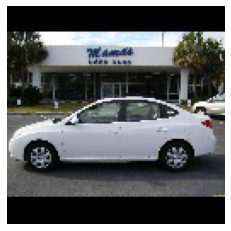

In [17]:
show_image(files[0])

../datasets/train/Car/02897.jpeg


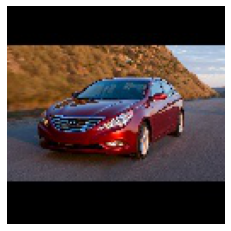

In [18]:
show_image(files[2900])

In [ ]:
def label_func(f): 